In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

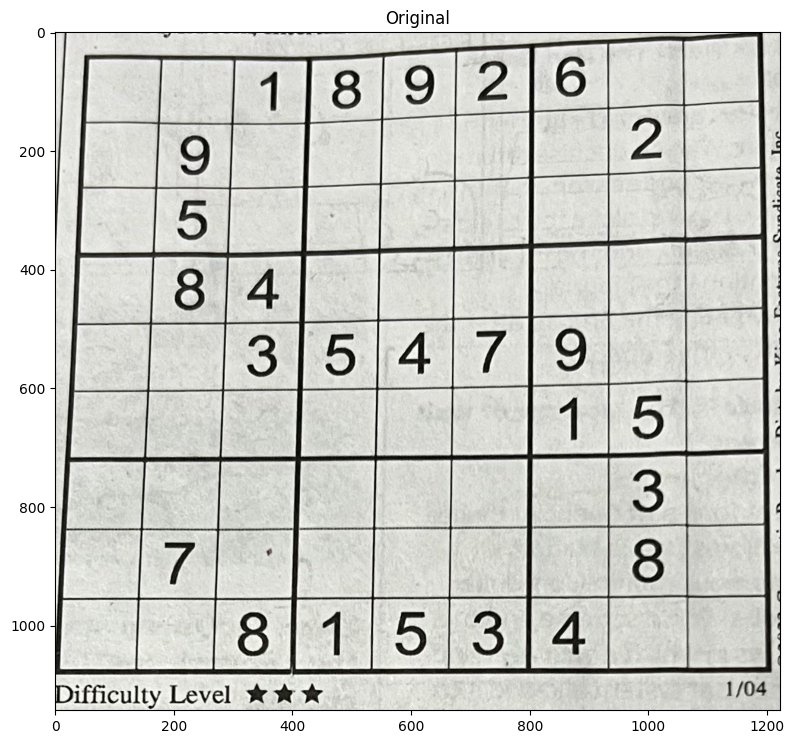

In [32]:
image = cv2.imread('sudoku.png')
imshow("Original", image)

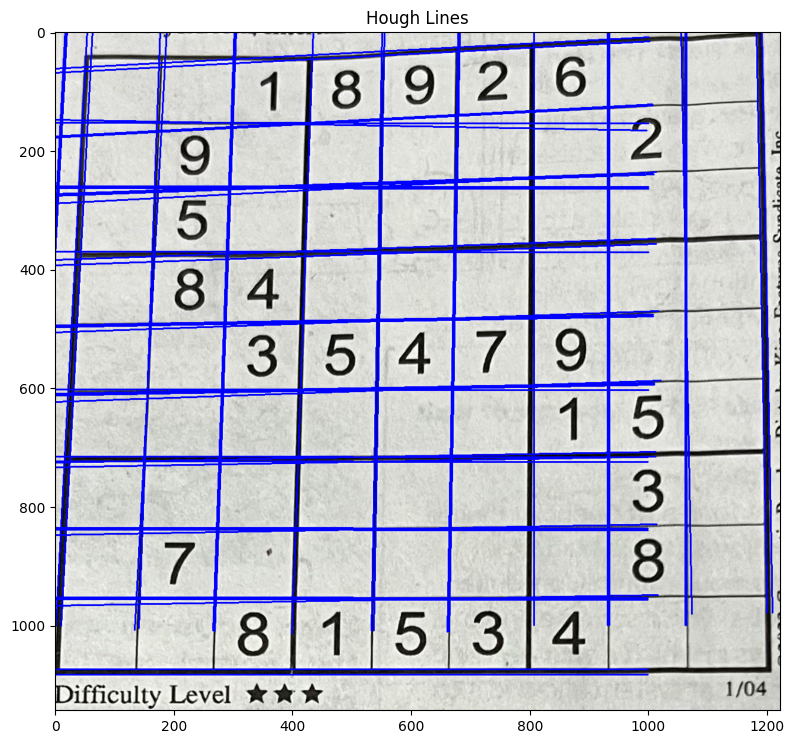

In [33]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)


lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)


for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
#     rcos(theta)-1000sin(theta)
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow('Hough Lines', image)

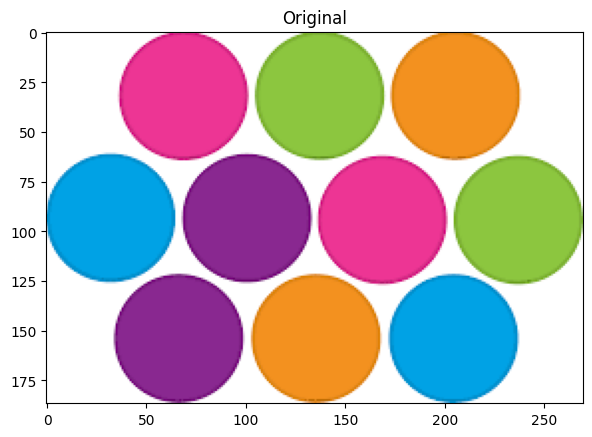

In [34]:
image = cv2.imread('circle.png')
imshow("Original", image)

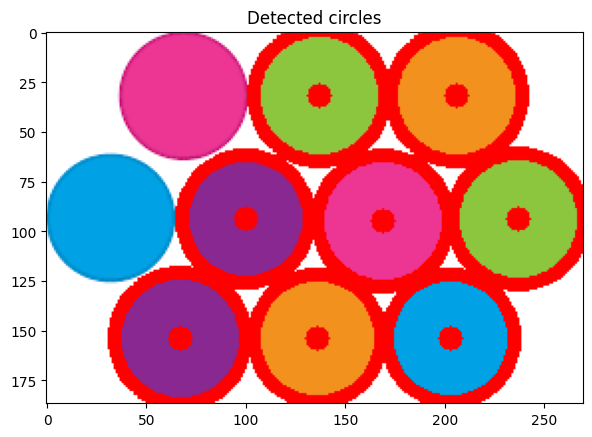

In [35]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 25)

cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)

circles = np.uint16(np.around(circles))


for i in circles[0,:]:
    
    cv2.circle(image,(i[0], i[1]), i[2], (0, 0, 255), 5)
    
    cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 8)


    
imshow('Detected circles', image)

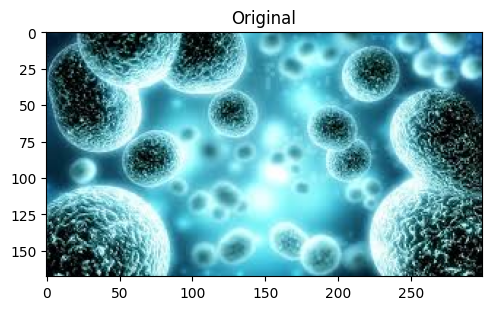

In [36]:
image = cv2.imread('blob.jpg')
imshow('Original' , image)

In [37]:
# cv2.drawKeypoints(input image, keypoints, blank_output_array, color, flags)



# cv2.DRAW_MATCHES_FLAGS_DEFAULT
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
# cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
# cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

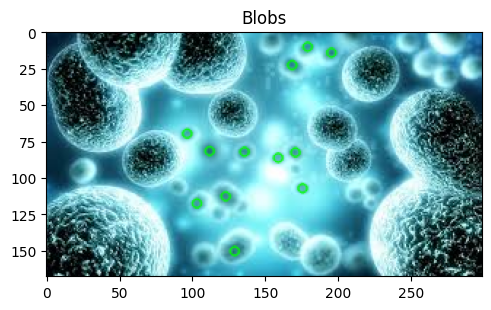

In [38]:
detector = cv2.SimpleBlobDetector_create()
 
keypoints = detector.detect(image)

    
blank = np.zeros((1,1)) 

blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DEFAULT)
 

imshow("Blobs", blobs)